In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
data = pd.read_parquet(r"C:\Users\Abdullahi Mujaheed\Downloads\0000.parquet")

In [3]:
data.isna().sum()

incident_id          0
timestamp            0
lat                  0
lon                  0
severity             0
cause                0
vehicles_involved    0
injuries             0
fatalities           0
dtype: int64

In [4]:
data

,incident_id,timestamp,lat,lon,severity,cause,vehicles_involved,injuries,fatalities
0,ACC-000000000,2025-08-13 22:11:46,7.904524,9.063451,minor,mechanical,1,1,0
1,ACC-000000001,2025-08-31 11:05:01,5.045854,6.980763,minor,speeding,1,0,0
2,ACC-000000002,2024-10-23 07:37:08,10.580382,12.807744,minor,fatigue,2,0,0
3,ACC-000000003,2025-05-05 04:18:58,5.797009,5.959519,moderate,distracted,1,0,0
4,ACC-000000004,2025-05-31 18:37:47,8.273795,9.907821,minor,fatigue,1,2,0
...,...,...,...,...,...,...,...,...,...
139995,ACC-000139995,2025-10-07 00:22:13,8.838967,11.094353,minor,distracted,1,2,0
139996,ACC-000139996,2025-04-13 21:53:50,4.531088,2.868454,severe,mechanical,1,1,0
139997,ACC-000139997,2025-01-22 23:50:35,10.876911,12.892178,minor,fatigue,2,1,0
139998,ACC-000139998,2025-02-12 16:21:27,7.625619,3.026864,minor,speeding,2,0,0


In [9]:
data.describe()

,lat,lon,vehicles_involved,injuries,fatalities
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,9.051929,8.708604,1.802000,0.797129,0.050086
std,2.793605,3.461937,1.058505,0.892864,0.223013
min,4.162352,2.662020,1.000000,0.000000,0.000000
25%,6.632991,5.726189,1.000000,0.000000,0.000000
50%,9.048550,8.702613,1.000000,1.000000,0.000000
75%,11.468907,11.698141,2.000000,1.000000,0.000000
max,13.946443,14.740101,10.000000,7.000000,3.000000


In [10]:
data.columns, data.dtypes

(Index(['incident_id', 'timestamp', 'lat', 'lon', 'severity', 'cause',
        'vehicles_involved', 'injuries', 'fatalities'],
       dtype='object'),
 incident_id           object
 timestamp             object
 lat                  float64
 lon                  float64
 severity              object
 cause                 object
 vehicles_involved      int64
 injuries               int64
 fatalities             int64
 dtype: object)

In [11]:
data.timestamp = pd.to_datetime(data.timestamp)

In [12]:
data.describe()

,timestamp,lat,lon,vehicles_involved,injuries,fatalities
count,140000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,2025-04-13 07:10:49.576450304,9.051929,8.708604,1.802000,0.797129,0.050086
min,2024-10-12 11:23:54,4.162352,2.662020,1.000000,0.000000,0.000000
25%,2025-01-12 03:33:44.249999872,6.632991,5.726189,1.000000,0.000000,0.000000
50%,2025-04-13 02:47:43.500000,9.048550,8.702613,1.000000,1.000000,0.000000
75%,2025-07-14 00:41:25,11.468907,11.698141,2.000000,1.000000,0.000000
max,2025-10-12 11:06:01,13.946443,14.740101,10.000000,7.000000,3.000000
std,NaN,2.793605,3.461937,1.058505,0.892864,0.223013


the data spans from october 12th, 2024 to october 12th, 2025. Exactly one year

In [13]:
data.fatalities.value_counts(), data.severity.value_counts(), data.cause.value_counts()

(fatalities
 0    133137
 1      6716
 2       145
 3         2
 Name: count, dtype: int64,
 severity
 minor       86640
 moderate    36431
 severe      14082
 fatal        2847
 Name: count, dtype: int64,
 cause
 speeding      42209
 distracted    34848
 mechanical    27906
 fatigue       14064
 weather       13869
 other          7104
 Name: count, dtype: int64)

In [14]:
data.head()

,incident_id,timestamp,lat,lon,severity,cause,vehicles_involved,injuries,fatalities
0,ACC-000000000,2025-08-13 22:11:46,7.904524,9.063451,minor,mechanical,1,1,0
1,ACC-000000001,2025-08-31 11:05:01,5.045854,6.980763,minor,speeding,1,0,0
2,ACC-000000002,2024-10-23 07:37:08,10.580382,12.807744,minor,fatigue,2,0,0
3,ACC-000000003,2025-05-05 04:18:58,5.797009,5.959519,moderate,distracted,1,0,0
4,ACC-000000004,2025-05-31 18:37:47,8.273795,9.907821,minor,fatigue,1,2,0


In [15]:
data['month'] = data.timestamp.dt.month

In [16]:
monthly_counts =data.month.value_counts().sort_index()

In [17]:
monthly_counts.values

array([11932, 10691, 11933, 11374, 11937, 11292, 12012, 11936, 11682,
       11931, 11365, 11915])

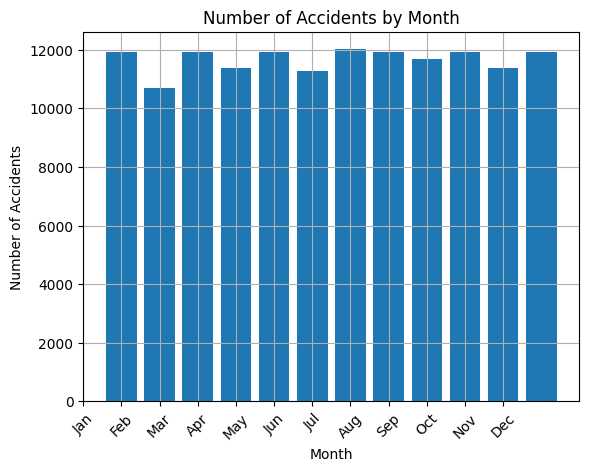

In [18]:
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation= 45)
plt.grid()
plt.show()

the least month of road accidents is February with roughly 10700, while the month with the most road accidents is August with over 12000 accidents.

In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.tree import DecisionTreeClassifier

In [20]:
vect = DictVectorizer(sparse=False)

In [21]:
data_cat = data[['severity', 'cause']]

In [22]:
data_cat

,severity,cause
0,minor,mechanical
1,minor,speeding
2,minor,fatigue
3,moderate,distracted
4,minor,fatigue
...,...,...
139995,minor,distracted
139996,severe,mechanical
139997,minor,fatigue
139998,minor,speeding


In [23]:
cat_vect = vect.fit_transform(data_cat.to_dict(orient='records'))

In [177]:
client = [{'timestamp': '2025-09-01 15:16:08', 'lat': 7.681686, 'lon': 12.088482, 'severity': 'severe', 'cause': 'mechanical', 'vehicles_involved': 3, 'injuries': 4}]

In [ ]:
def predict(client):
    cl = pd.DataFrame(client)
    cl['month'] = pd.to_datetime(cl['date']).dt.month
    client_dicts = cl[['severity', 'cause']].to_dict(orient='records')
    client_cat = vect.transform(client_dicts)
    vect_data = pd.DataFrame(client_cat, columns=vect.get_feature_names_out())
    r = cl.drop(['severity', 'cause'], axis=1)
    f = r.join(vect_data)
    pred=log_reg.predict(f)
    return pred

In [185]:
predict(client)

AttributeError: 'numpy.ndarray' object has no attribute 'to_array'

(1, 15)

c:\Users\Abdullahi Mujaheed\Desktop\elevvo\elevvo-bootcamp\elevvo-venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
cat_vect

dtype('float64')

In [69]:
df_cat = pd.DataFrame(cat_vect, columns=vect.get_feature_names_out())

In [70]:
data_dropped = data.drop(columns=['severity', 'cause', 'incident_id'],)

In [71]:
data_dropped

,timestamp,lat,lon,vehicles_involved,injuries,fatalities,month
0,2025-08-13 22:11:46,7.904524,9.063451,1,1,0,8
1,2025-08-31 11:05:01,5.045854,6.980763,1,0,0,8
2,2024-10-23 07:37:08,10.580382,12.807744,2,0,0,10
3,2025-05-05 04:18:58,5.797009,5.959519,1,0,0,5
4,2025-05-31 18:37:47,8.273795,9.907821,1,2,0,5
...,...,...,...,...,...,...,...
139995,2025-10-07 00:22:13,8.838967,11.094353,1,2,0,10
139996,2025-04-13 21:53:50,4.531088,2.868454,1,1,0,4
139997,2025-01-22 23:50:35,10.876911,12.892178,2,1,0,1
139998,2025-02-12 16:21:27,7.625619,3.026864,2,0,0,2


<Axes: >

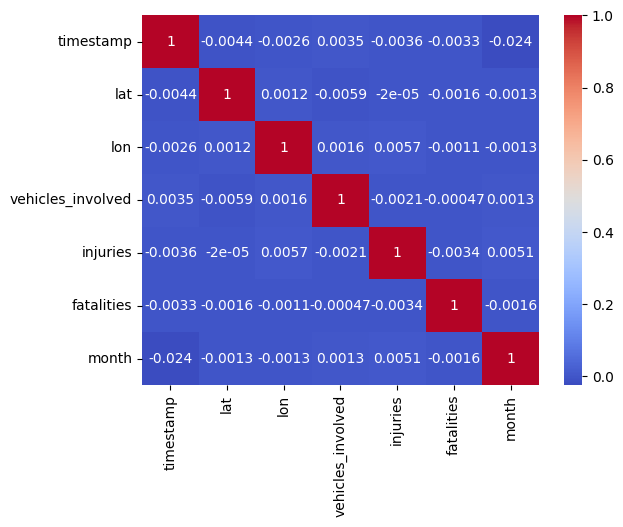

In [72]:
sns.heatmap(data_dropped.corr(), annot=True, cmap= 'coolwarm')

No correlation between the features whatsoever

In [73]:
full_data =data_dropped.join(df_cat)

In [74]:
full_data

,timestamp,lat,lon,vehicles_involved,injuries,fatalities,month,cause=distracted,cause=fatigue,cause=mechanical,cause=other,cause=speeding,cause=weather,severity=fatal,severity=minor,severity=moderate,severity=severe
0,2025-08-13 22:11:46,7.904524,9.063451,1,1,0,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2025-08-31 11:05:01,5.045854,6.980763,1,0,0,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2024-10-23 07:37:08,10.580382,12.807744,2,0,0,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2025-05-05 04:18:58,5.797009,5.959519,1,0,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2025-05-31 18:37:47,8.273795,9.907821,1,2,0,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,2025-10-07 00:22:13,8.838967,11.094353,1,2,0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
139996,2025-04-13 21:53:50,4.531088,2.868454,1,1,0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
139997,2025-01-22 23:50:35,10.876911,12.892178,2,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
139998,2025-02-12 16:21:27,7.625619,3.026864,2,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

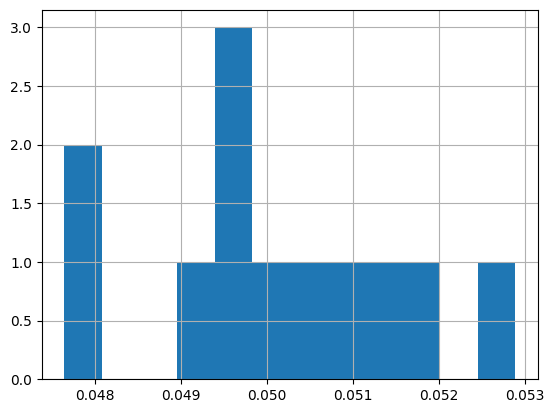

In [75]:
data['fatalities'].groupby(data['month']).mean().hist(bins=12)

In [76]:
data[data['month']==2]['fatalities'].value_counts()

fatalities
0    10171
1      511
2        9
Name: count, dtype: int64

In [77]:
y = full_data['fatalities'].values
X = full_data.drop(columns=['fatalities', 'timestamp']).values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state=42)

In [79]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [80]:
log_reg.fit(X_train, y_train)

c:\Users\Abdullahi Mujaheed\Desktop\elevvo\elevvo-bootcamp\elevvo-venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [81]:
y_log_pred = log_reg.predict(X_test)
y_log_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(35000,))

In [82]:
np.unique(y_log_pred), np.unique(y_test)

(array([0]), array([0, 1, 2, 3]))

In [33]:
rmse(y_test, y_log_pred)

0.2270934357735348

In [35]:
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)

In [36]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
from sklearn.utils.validation import check_is_fitted

In [38]:
y_pred_dtc = dtc.predict(X_test)
print(np.unique(y_pred_dtc, return_counts=True))

(array([0]), array([35000]))


In [39]:
print(dtc.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
rmse(y_test, y_pred_dtc)

0.2270934357735348

In [43]:
rmses = {}
for depth in tqdm(np.arange(2, 22, 2)):
    dtcs = DecisionTreeClassifier(max_depth= depth, random_state=2)
    dtcs.fit(X_train, y_train)
    y_dtcs = dtcs.predict(X_test)
    rmse_dtc = rmse(y_test, y_dtcs)
    rmses[depth] = rmse_dtc

100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


In [44]:
rmses

{np.int64(2): 0.2270934357735348,
 np.int64(4): 0.22715633383201095,
 np.int64(6): 0.22721921447925883,
 np.int64(8): 0.22765889270698703,
 np.int64(10): 0.2284106577448359,
 np.int64(12): 0.23052734575936354,
 np.int64(14): 0.232379000772445,
 np.int64(16): 0.2361597522259637,
 np.int64(18): 0.23940402192587684,
 np.int64(20): 0.24336920805346643}

since the best rmse score with the decision tree is the same with that of the logistic regression, we save the logistic regression

In [112]:
import pickle as pkl

In [113]:
with open(r'C:\Users\Abdullahi Mujaheed\Desktop\mlzoom\mlzoomcamp\first_pipenv\vectorizer_and_model', 'wb') as f_out:
    pkl.dump((vect, log_reg), f_out)